# 00Z Model

## Scott Burgholzer MSDS Capstone Project Fall 2019

###### Import all Python Libraries and set up seed value

In [1]:
import os
os.environ['PYTHONHASHSEED']=str(0)

import random
random.seed(0)

from numpy.random import seed
seed(0)

import tensorflow as tf

print(tf.__version__)
from tensorflow import keras
tf.random.set_seed(0)

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2, l1, l1_l2


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
#tf.keras.wrappers.skikit_learn.KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


2.0.0-beta1


###### Get the data and split into Train/Test sets

In [2]:
data = pd.read_csv(r'D:\MSDS-Capstone-Project\implementation\Data\00Z-randomized.csv')
data.rename( columns={'Unnamed: 0':'Date'}, inplace=True )
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.sample(frac=1)
data.loc[data.COUNT < 5, 'countBinary2'] = 0
data.loc[data.COUNT >= 5, 'countBinary2'] = 1
data

,2mTemp,2mDpt,sfcCAPE,sfcCIN,sfcPotentialTmp,sfcPressure,PWAT,2mRH,srh,lifted index 180-0 mb above gnd Best (4-layer),...,700mb wind speed,850mb Geopotenial height,850mb Temperature,850mb wind speed,925mb Geopotenial height,925mb Temperature,925mb wind speed,COUNT,countBinary,countBinary2
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-05,296.024,284.861,1434.48000,-41.287100,303.119,92913.2,24.72760,57.5086,176.5260,-1.274190,...,12.97790,1448.80,289.481,13.33990,720.432,294.047,11.80200,90,1,1.0
1996-05-05,295.342,281.085,716.45700,-43.988800,303.045,93826.2,19.58630,49.1420,87.8943,0.297086,...,8.48143,1518.67,287.760,6.48512,797.283,292.648,6.36003,4,0,0.0
1984-11-21,277.697,271.927,6.36160,0.359532,280.818,94791.2,8.35590,68.4990,124.7430,11.632100,...,9.76754,1559.92,277.872,7.99399,871.064,278.073,8.29879,0,0,0.0
1980-09-11,299.813,287.138,589.99800,-23.062000,306.353,93342.8,30.72620,50.0345,75.7236,0.003031,...,6.95198,1496.56,292.847,6.25825,759.295,297.990,5.67788,0,0,0.0
1980-01-29,271.596,266.524,16.57510,-3.852980,276.327,94037.3,11.94960,72.0206,250.7420,10.464800,...,13.81400,1473.72,270.125,7.94221,804.781,271.493,6.36751,0,0,0.0
2008-07-18,302.998,288.952,742.20700,-30.590500,311.359,93531.1,31.70760,46.9575,50.9727,-1.770990,...,5.16565,1514.75,294.049,4.95419,774.375,299.748,4.94026,0,0,0.0
1987-12-14,275.510,270.612,138.27400,-6.928910,280.054,93524.1,12.19850,73.7059,154.5040,10.056100,...,13.11020,1456.77,271.053,9.92889,778.851,274.796,8.81124,5,1,1.0
1981-12-11,281.314,274.095,20.10100,-4.533820,285.438,93674.9,13.02810,65.0585,110.1610,6.695620,...,9.57303,1474.22,279.822,5.45871,777.311,281.928,5.55266,0,0,0.0
1984-12-11,282.778,277.576,11.27160,-8.268680,287.471,92789.8,16.80240,72.5311,145.1510,4.486310,...,14.70210,1409.09,280.698,11.60500,709.164,283.433,9.50940,0,0,0.0


In [3]:
# creating input featues and target variables
X = data.iloc[:,0:26]
y = data.iloc[:,28]

In [4]:
X.shape

(12783, 26)

In [5]:
X.tail()

,2mTemp,2mDpt,sfcCAPE,sfcCIN,sfcPotentialTmp,sfcPressure,PWAT,2mRH,srh,lifted index 180-0 mb above gnd Best (4-layer),...,500mb wind speed,700mb Geopotenial height,700mb Temperature,700mb wind speed,850mb Geopotenial height,850mb Temperature,850mb wind speed,925mb Geopotenial height,925mb Temperature,925mb wind speed
Date,,,,,,,,,,,,,,,,,,,,,
1982-08-07,302.824,288.487,749.67000,-16.80610,310.883,93868.6,34.60140,47.2215,43.2824,-1.542970,...,9.61511,3194.60,282.577,7.49152,1547.53,294.168,5.56450,806.799,299.758,5.12896
2012-05-19,298.841,281.882,666.95300,-61.85250,306.858,93481.0,20.02950,42.1551,85.9636,-0.531833,...,11.02380,3128.25,279.746,7.67408,1503.18,290.258,8.10713,773.331,296.039,7.46420
2000-01-05,276.218,267.942,3.26118,-1.02974,279.605,93740.5,7.31233,62.0451,129.4820,8.640940,...,20.55800,3025.29,269.158,13.89940,1469.77,275.685,10.79370,784.373,277.675,8.19816
2008-01-30,272.827,264.356,12.14730,-2.29449,277.598,93346.1,7.41344,60.1138,190.5870,8.066170,...,24.67630,2958.61,265.510,15.45510,1421.96,272.505,10.18830,745.953,273.153,8.44339
2003-03-04,278.381,270.692,3.17754,-4.71851,284.884,92812.2,11.51840,65.1652,162.2310,8.189830,...,31.40860,2932.52,267.614,16.71750,1389.06,273.647,9.56282,706.560,277.242,8.37547


In [6]:
y.value_counts()

0.0    11180
1.0     1603
Name: countBinary2, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [8]:
scaler = StandardScaler().fit(X_train)
X_Train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

###### Function to plot the losses

In [9]:
def plot_history(hist):
    fig = plt.figure(figsize=(6,4))
    # # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], 'g--')
    plt.title('Classification Model Loss')
    plt.ylabel('Binary Crossentropy')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
    print ("Loss after final iteration: ", history.history['val_loss'][-1])
    plt.show()

#### Machine Learning Models

###### Attempt 1

In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate = 0.001, momentum=0.5), 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7669 samples, validate on 2557 samples
Epoch 1/10
7669/7669 [==============================] - 1s 77us/sample - loss: 8.6998 - accuracy: 0.5031 - val_loss: 1.6108 - val_accuracy: 0.7337
Epoch 2/10
7669/7669 [==============================] - 0s 3us/sample - loss: 3.1248 - accuracy: 0.8675 - val_loss: 1.5971 - val_accuracy: 0.7665
Epoch 3/10
7669/7669 [==============================] - 0s 2us/sample - loss: 3.1248 - accuracy: 0.8675 - val_loss: 1.5937 - val_accuracy: 0.7743
Epoch 4/10
7669/7669 [==============================] - 0s 2us/sample - loss: 3.1267 - accuracy: 0.8674 - val_loss: 1.5927 - val_accuracy: 0.7755
Epoch 5/10
7669/7669 [==============================] - 0s 2us/sample - loss: 3.1165 - accuracy: 0.8680 - val_loss: 1.5924 - val_accuracy: 0.7755
Epoch 6/10
7669/7669 [==============================] - 0s 2us/sample - loss: 3.1243 - accuracy: 0.8675 - val_loss: 1.5922 - val_accuracy: 0.7759
Epoch 7/10
7669/7669 [==============================] - 0s 2us/sample - los

In [41]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7669/7669 [==============================] - 0s 31us/sample - loss: 3.1095 - accuracy: 0.8684
[3.109454887042939, 0.8684313]


In [42]:
model.evaluate(X_test, y_test, verbose=0)

[1.5983758631468659, 0.7676965]

Loss after final iteration:  1.59152090549469


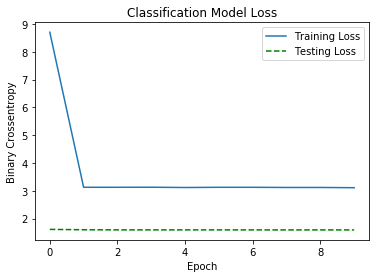

In [43]:
plot_history(history)

In [44]:
predictions = pd.DataFrame(model.predict(X_test))


predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.7676965193586234
confusion matrix
 [[1903  255]
 [ 339   60]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      2158
         1.0       0.19      0.15      0.17       399

   micro avg       0.77      0.77      0.77      2557
   macro avg       0.52      0.52      0.52      2557
weighted avg       0.75      0.77      0.76      2557



###### Attempt 2, using Adadelta optimizer

In [45]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7669 samples, validate on 2557 samples
Epoch 1/10
7669/7669 [==============================] - 1s 71us/sample - loss: 12.5444 - accuracy: 0.2526 - val_loss: 1.8584 - val_accuracy: 0.3911
Epoch 2/10
7669/7669 [==============================] - 0s 2us/sample - loss: 12.4062 - accuracy: 0.2616 - val_loss: 1.8584 - val_accuracy: 0.3911
Epoch 3/10
7669/7669 [==============================] - 0s 2us/sample - loss: 12.4683 - accuracy: 0.2575 - val_loss: 1.8584 - val_accuracy: 0.3911
Epoch 4/10
7669/7669 [==============================] - 0s 2us/sample - loss: 12.4653 - accuracy: 0.2577 - val_loss: 1.8583 - val_accuracy: 0.3911
Epoch 5/10
7669/7669 [==============================] - 0s 2us/sample - loss: 12.4842 - accuracy: 0.2565 - val_loss: 1.8583 - val_accuracy: 0.3911
Epoch 6/10
7669/7669 [==============================] - 0s 2us/sample - loss: 12.4823 - accuracy: 0.2566 - val_loss: 1.8583 - val_accuracy: 0.3911
Epoch 7/10
7669/7669 [==============================] - 0s 2us/sample

In [46]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7669/7669 [==============================] - 0s 35us/sample - loss: 14.3976 - accuracy: 0.1316
[14.397629514637757, 0.13156866]


In [47]:
model.evaluate(X_test, y_test, verbose=0)

[1.856068138876696, 0.38834572]

Loss after final iteration:  1.8582136631011963


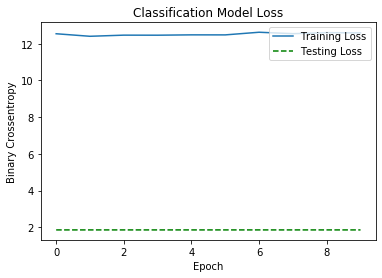

In [48]:
plot_history(history)

In [49]:
predictions = pd.DataFrame(model.predict(X_test))
predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.38834571763785686
confusion matrix
 [[ 728   50]
 [1514  265]]
              precision    recall  f1-score   support

         0.0       0.32      0.94      0.48       778
         1.0       0.84      0.15      0.25      1779

   micro avg       0.39      0.39      0.39      2557
   macro avg       0.58      0.54      0.37      2557
weighted avg       0.68      0.39      0.32      2557



##### Attempt 3, Adagrad

In [51]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adagrad(), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7669 samples, validate on 2557 samples
Epoch 1/10
7669/7669 [==============================] - 1s 73us/sample - loss: 13.8959 - accuracy: 0.1640 - val_loss: 2.1469 - val_accuracy: 0.2839
Epoch 2/10
7669/7669 [==============================] - 0s 2us/sample - loss: 13.7617 - accuracy: 0.1728 - val_loss: 2.1361 - val_accuracy: 0.3015
Epoch 3/10
7669/7669 [==============================] - 0s 2us/sample - loss: 13.6126 - accuracy: 0.1827 - val_loss: 2.1304 - val_accuracy: 0.3121
Epoch 4/10
7669/7669 [==============================] - 0s 2us/sample - loss: 13.6152 - accuracy: 0.1824 - val_loss: 2.1274 - val_accuracy: 0.3172
Epoch 5/10
7669/7669 [==============================] - 0s 2us/sample - loss: 13.5469 - accuracy: 0.1869 - val_loss: 2.1299 - val_accuracy: 0.3113
Epoch 6/10
7669/7669 [==============================] - 0s 2us/sample - loss: 13.6641 - accuracy: 0.1793 - val_loss: 2.1236 - val_accuracy: 0.3219
Epoch 7/10
7669/7669 [==============================] - 0s 2us/sample

In [52]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7669/7669 [==============================] - 0s 38us/sample - loss: 14.3942 - accuracy: 0.1316
[14.394240156117249, 0.13156866]


In [53]:
model.evaluate(X_test, y_test, verbose=0)

[2.1021669257838695, 0.33437622]

Loss after final iteration:  2.124636173248291


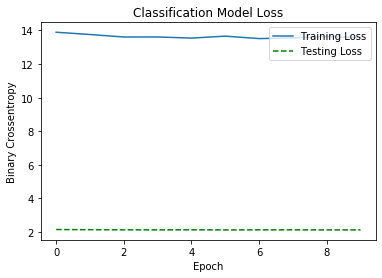

In [54]:
plot_history(history)

In [55]:
predictions = pd.DataFrame(model.predict(X_test))
predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.3343762221353148
confusion matrix
 [[ 655  115]
 [1587  200]]
              precision    recall  f1-score   support

         0.0       0.29      0.85      0.43       770
         1.0       0.63      0.11      0.19      1787

   micro avg       0.33      0.33      0.33      2557
   macro avg       0.46      0.48      0.31      2557
weighted avg       0.53      0.33      0.26      2557



##### Attempt 4, Adam

In [56]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])



history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7669 samples, validate on 2557 samples
Epoch 1/10
7669/7669 [==============================] - 1s 78us/sample - loss: 4.5963 - accuracy: 0.7713 - val_loss: 1.7535 - val_accuracy: 0.5808
Epoch 2/10
7669/7669 [==============================] - 0s 3us/sample - loss: 4.6350 - accuracy: 0.7679 - val_loss: 1.7339 - val_accuracy: 0.5925
Epoch 3/10
7669/7669 [==============================] - 0s 2us/sample - loss: 4.5966 - accuracy: 0.7695 - val_loss: 1.7141 - val_accuracy: 0.6089
Epoch 4/10
7669/7669 [==============================] - 0s 2us/sample - loss: 4.4432 - accuracy: 0.7788 - val_loss: 1.6967 - val_accuracy: 0.6167
Epoch 5/10
7669/7669 [==============================] - 0s 2us/sample - loss: 4.0581 - accuracy: 0.8030 - val_loss: 1.6765 - val_accuracy: 0.6367
Epoch 6/10
7669/7669 [==============================] - 0s 2us/sample - loss: 3.9874 - accuracy: 0.8071 - val_loss: 1.6560 - val_accuracy: 0.6551
Epoch 7/10
7669/7669 [==============================] - 0s 2us/sample - los

In [31]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7669/7669 [==============================] - 0s 42us/sample - loss: 3.0179 - accuracy: 0.8684
[3.0179091264113778, 0.8684313]


In [57]:
model.evaluate(X_test, y_test, verbose=0)

[1.5855850353341667, 0.7027767]

Loss after final iteration:  1.5806407928466797


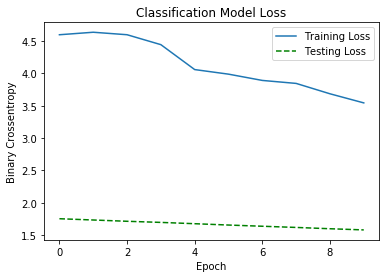

In [58]:
plot_history(history)

In [59]:
predictions = pd.DataFrame(model.predict(X_test))

#predictions

predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.7027766914352758
confusion matrix
 [[1693  211]
 [ 549  104]]
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      1904
         1.0       0.33      0.16      0.21       653

   micro avg       0.70      0.70      0.70      2557
   macro avg       0.54      0.52      0.52      2557
weighted avg       0.65      0.70      0.66      2557



###### Attempt 5, NAdam

In [60]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=26, activation='relu', kernel_initializer=keras.initializers.he_uniform(seed=0), 
                             kernel_regularizer=l1_l2(0.001), input_shape=(26,)))
model.add(keras.layers.Dense(units=26, activation='relu', kernel_regularizer=l1_l2(0.001)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=l1_l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Nadam(learning_rate=0.003), 
              metrics=['accuracy'])



history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, batch_size=6500)

Train on 7669 samples, validate on 2557 samples
Epoch 1/10
7669/7669 [==============================] - 1s 106us/sample - loss: 9.6582 - accuracy: 0.4416 - val_loss: 1.6152 - val_accuracy: 0.7290
Epoch 2/10
7669/7669 [==============================] - 0s 2us/sample - loss: 5.8458 - accuracy: 0.6894 - val_loss: 1.5789 - val_accuracy: 0.7869
Epoch 3/10
7669/7669 [==============================] - 0s 2us/sample - loss: 4.6001 - accuracy: 0.7695 - val_loss: 1.5524 - val_accuracy: 0.8068
Epoch 4/10
7669/7669 [==============================] - 0s 2us/sample - loss: 4.1275 - accuracy: 0.7988 - val_loss: 1.5236 - val_accuracy: 0.8342
Epoch 5/10
7669/7669 [==============================] - 0s 2us/sample - loss: 3.8848 - accuracy: 0.8133 - val_loss: 1.4978 - val_accuracy: 0.8467
Epoch 6/10
7669/7669 [==============================] - 0s 2us/sample - loss: 3.6025 - accuracy: 0.8301 - val_loss: 1.4657 - val_accuracy: 0.8651
Epoch 7/10
7669/7669 [==============================] - 0s 2us/sample - lo

In [61]:
eval_model=model.evaluate(X_train, y_train)
print(eval_model)

7669/7669 [==============================] - 0s 33us/sample - loss: 2.9050 - accuracy: 0.8684
[2.9049945115452407, 0.8684313]


In [62]:
model.evaluate(X_test, y_test, verbose=0)

[1.3601565238876552, 0.8728979]

Loss after final iteration:  1.3521853685379028


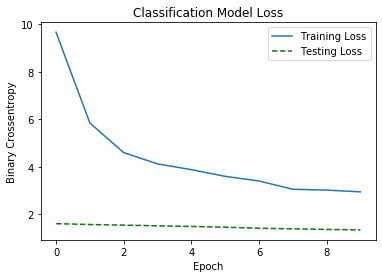

In [63]:
plot_history(history)

In [64]:
predictions = pd.DataFrame(model.predict(X_test))

#predictions

predictions[predictions > 0.5] = 1 #'5 or more Tornadoes'
predictions[predictions <= 0.5] = 0 #'Less than 5 Tornadoes'

print('accuracy', accuracy_score(predictions, y_test))
print('confusion matrix\n', confusion_matrix(predictions,y_test))

print(classification_report(predictions, y_test))

accuracy 0.872897927258506
confusion matrix
 [[2191  274]
 [  51   41]]
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      2465
         1.0       0.13      0.45      0.20        92

   micro avg       0.87      0.87      0.87      2557
   macro avg       0.55      0.67      0.57      2557
weighted avg       0.95      0.87      0.90      2557

